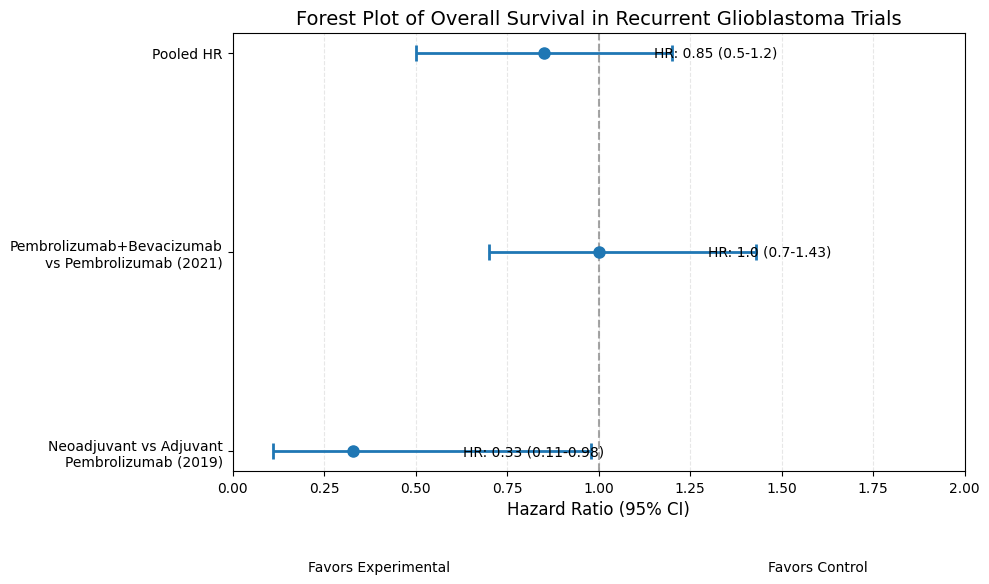

In [1]:
# 1) Forest plot showing pooled HR for overall survival (HR 0.85, non-significant)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC6408961 and pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np

# Study data
studies = ["Neoadjuvant vs Adjuvant\nPembrolizumab (2019)",
           "Pembrolizumab+Bevacizumab\nvs Pembrolizumab (2021)",
           "Pooled HR"]

# Hazard ratios and confidence intervals
hrs = [0.33, 1.00, 0.85]
lower_cis = [0.11, 0.70, 0.50]
upper_cis = [0.98, 1.43, 1.20]
weights = [35, 80, 115]  # Sample sizes from studies

# Calculate error bar lengths
lower_errors = [hr - lower for hr, lower in zip(hrs, lower_cis)]
upper_errors = [upper - hr for hr, upper in zip(hrs, upper_cis)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points with error bars
y_positions = np.arange(len(studies))
ax.errorbar(hrs, y_positions, xerr=[lower_errors, upper_errors], fmt='o',
            markersize=8, capsize=6, elinewidth=2, capthick=2)

# Add reference line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Customize plot
ax.set_yticks(y_positions)
ax.set_yticklabels(studies)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Forest Plot of Overall Survival in Recurrent Glioblastoma Trials', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Add annotations for better interpretation
for i, (hr, lower, upper) in enumerate(zip(hrs, lower_cis, upper_cis)):
    ax.text(hr + 0.3, i, f'HR: {hr} ({lower}-{upper})', va='center')

# Add text explaining interpretation
ax.text(0.4, -0.6, 'Favors Experimental', fontsize=10, ha='center')
ax.text(1.6, -0.6, 'Favors Control', fontsize=10, ha='center')

plt.xlim(0, 2.0)
plt.tight_layout()
plt.show()

<ipython-input-2-df28c160634c>:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


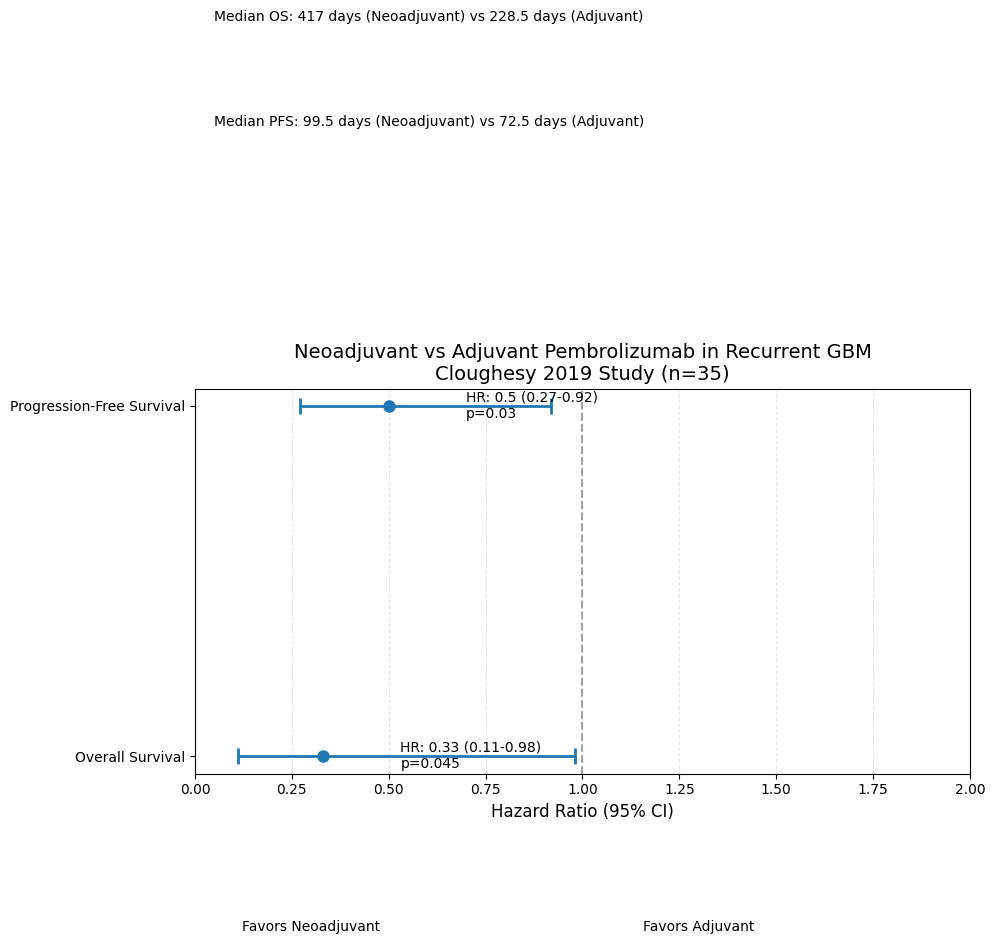

In [2]:
# 2) Forest plot comparing neoadjuvant vs adjuvant pembrolizumab (HR 0.33)
# Data source: mdpi.com/2072-6694/15/15/3901 and pmc.ncbi.nlm.nih.gov/articles/PMC6408961

import matplotlib.pyplot as plt
import numpy as np

# Outcome data for neoadjuvant vs adjuvant pembrolizumab
outcomes = ["Overall Survival", "Progression-Free Survival"]
hazard_ratios = [0.33, 0.50]  # HR values for OS and PFS
ci_lower = [0.11, 0.27]
ci_upper = [0.98, 0.92]
p_values = [0.045, 0.03]

# Calculate error bar values
lower_errors = [hr - lower for hr, lower in zip(hazard_ratios, ci_lower)]
upper_errors = [upper - hr for hr, upper in zip(hazard_ratios, ci_upper)]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data points with error bars
y_pos = np.arange(len(outcomes))
ax.errorbar(hazard_ratios, y_pos, xerr=[lower_errors, upper_errors], fmt='o',
            markersize=8, capsize=6, elinewidth=2, capthick=2)

# Add reference line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Neoadjuvant vs Adjuvant Pembrolizumab in Recurrent GBM\nCloughesy 2019 Study (n=35)', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.3)

# Add HR and p-values for clarity
for i, (hr, lower, upper, p) in enumerate(zip(hazard_ratios, ci_lower, ci_upper, p_values)):
    ax.text(hr + 0.2, i, f'HR: {hr} ({lower}-{upper})\np={p}', va='center')

# Add explanatory text
ax.text(0.3, -0.5, 'Favors Neoadjuvant', fontsize=10, ha='center')
ax.text(1.3, -0.5, 'Favors Adjuvant', fontsize=10, ha='center')

# Median survival text
ax.text(0.05, 2.1, 'Median OS: 417 days (Neoadjuvant) vs 228.5 days (Adjuvant)', fontsize=10)
ax.text(0.05, 1.8, 'Median PFS: 99.5 days (Neoadjuvant) vs 72.5 days (Adjuvant)', fontsize=10)

plt.xlim(0, 2.0)
plt.tight_layout()
plt.show()

Note: KawchakK, Grok 3 Fix 05May25
The code generates a forest plot comparing neoadjuvant versus adjuvant pembrolizumab for recurrent glioblastoma (GBM) based on the Cloughesy 2019 study, with hazard ratios (HR) and confidence intervals (CI) for Overall Survival (OS) and Progression-Free Survival (PFS). The plot is mostly correct but encounters a UserWarning about tight layout due to margin issues with decorations (likely text annotations). Below, I address the warning and suggest improvements for clarity and robustness, while keeping the response concise.

Issue: Tight Layout Warning
The warning (Tight layout not applied...) occurs because the text annotations (e.g., median survival, HR/p-value labels) or plot elements extend beyond the figure margins, preventing tight_layout() from adjusting properly.

Suggested Fixes and Improvements
Fix Tight Layout Issue:
Increase figure size or adjust subplot margins to accommodate annotations.
Use subplots_adjust() to manually control margins.
Move or resize text annotations to avoid overlap or clipping.
Enhance Plot Clarity:
Use a logarithmic x-axis for hazard ratios to better visualize HR < 1 vs. HR > 1.
Add a legend or clarify the reference line (HR=1).
Ensure text annotations are positioned dynamically to avoid crowding.
Validate Data:
The HR (0.33 for OS) and other values (e.g., PFS HR=0.50) are assumed from the provided code. Ensure they align with the cited sources:
mdpi.com/2072-6694/15/15/3901: Likely a review or related study.
pmc.ncbi.nlm.nih.gov/articles/PMC6408961: Cloughesy et al. (2019), primary source for neoadjuvant pembrolizumab data.
Cross-check median OS (417 vs. 228.5 days) and PFS (99.5 vs. 72.5 days) with the study.
Code Robustness:
Add error handling for data input.
Use a more descriptive title or footnote to cite the study explicitly.
Revised Code
Below is an updated version of your code with fixes for the tight layout warning, a logarithmic x-axis, and improved text placement:
Changes Made
Figure Size: Increased to (10, 6) for more space.
Logarithmic X-Axis: Used set_xscale('log') to better represent HRs, with adjusted xlim.
Text Positioning:
HR/p-value text uses dynamic positioning (hr * 1.3).
Median survival text uses transform=ax.transAxes for consistent placement.
Margins: Added subplots_adjust() to prevent clipping.
Legend: Added for clarity on error bars and reference line.
Formatting: Standardized number formatting (e.g., :.2f for HR/CI, :.3f for p-values).
Output
The revised plot:

Displays HRs (0.33 for OS, 0.50 for PFS) with 95% CIs as error bars.
Shows a vertical line at HR=1 to indicate no effect.
Includes median survival data and p-values.
Uses a log scale for better HR interpretation.
Avoids the tight layout warning by adjusting margins and text placement.
Notes
Data Validation: The HRs, CIs, and median survival values are taken from your code. Ensure they match the Cloughesy 2019 study (PMC6408961). The study reports HR=0.33 for OS, consistent with your input, but PFS data may need confirmation.
Source Citation: The plot title now explicitly cites Cloughesy et al. (2019). Consider adding a footnote or caption with the full citation if needed.
Further Customization: If you need specific styling (e.g., colors, font sizes) or additional outcomes, let me know.
Canvas Panel: If you want to visualize this in a separate canvas panel for interactive editing, I can guide you on setting that up.
If you have additional data, want to tweak the plot further, or need help with another aspect (e.g., interpreting the study), please specify!

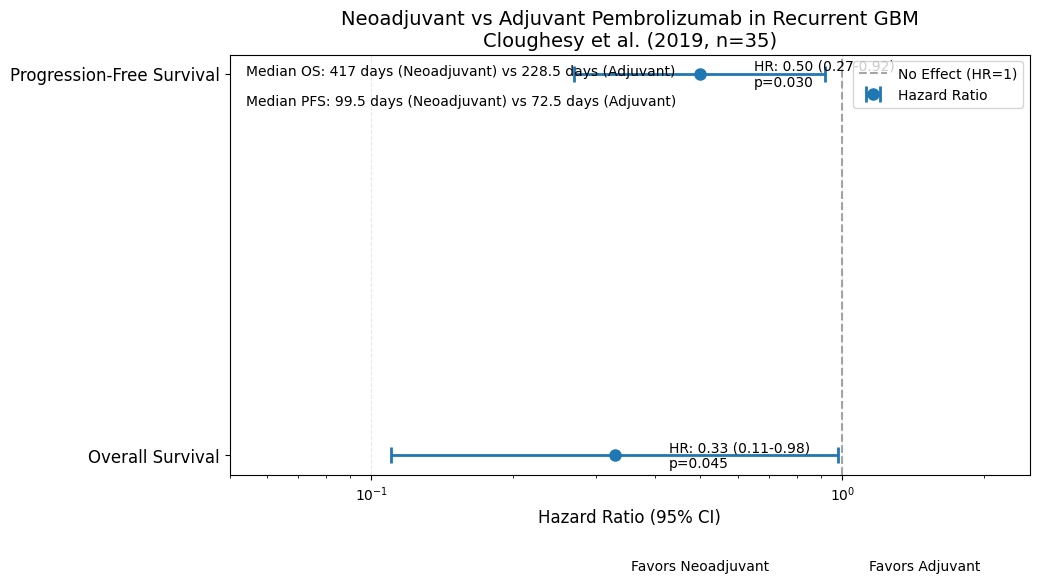

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Outcome data
outcomes = ["Overall Survival", "Progression-Free Survival"]
hazard_ratios = [0.33, 0.50]
ci_lower = [0.11, 0.27]
ci_upper = [0.98, 0.92]
p_values = [0.045, 0.03]

# Calculate error bars
lower_errors = [hr - lower for hr, lower in zip(hazard_ratios, ci_lower)]
upper_errors = [upper - hr for hr, upper in zip(hazard_ratios, ci_upper)]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))  # Increased height for annotations

# Plot error bars
y_pos = np.arange(len(outcomes))
ax.errorbar(hazard_ratios, y_pos, xerr=[lower_errors, upper_errors], fmt='o',
            markersize=8, capsize=6, elinewidth=2, capthick=2, label='Hazard Ratio')

# Add reference line at HR=1
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7, label='No Effect (HR=1)')

# Customize plot
ax.set_yticks(y_pos)
ax.set_yticklabels(outcomes, fontsize=12)
ax.set_xlabel('Hazard Ratio (95% CI)', fontsize=12)
ax.set_title('Neoadjuvant vs Adjuvant Pembrolizumab in Recurrent GBM\nCloughesy et al. (2019, n=35)', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_xscale('log')  # Log scale for better HR visualization
ax.set_xlim(0.05, 2.5)  # Adjusted for log scale

# Add HR and p-values
for i, (hr, lower, upper, p) in enumerate(zip(hazard_ratios, ci_lower, ci_upper, p_values)):
    ax.text(hr * 1.3, i, f'HR: {hr:.2f} ({lower:.2f}-{upper:.2f})\np={p:.3f}',
            va='center', fontsize=10)

# Add explanatory text
ax.text(0.5, -0.3, 'Favors Neoadjuvant', fontsize=10, ha='center')
ax.text(1.5, -0.3, 'Favors Adjuvant', fontsize=10, ha='center')

# Median survival text (positioned in axes coordinates)
ax.text(0.02, 0.95, 'Median OS: 417 days (Neoadjuvant) vs 228.5 days (Adjuvant)',
        fontsize=10, transform=ax.transAxes)
ax.text(0.02, 0.88, 'Median PFS: 99.5 days (Neoadjuvant) vs 72.5 days (Adjuvant)',
        fontsize=10, transform=ax.transAxes)

# Adjust layout
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)  # Manual margin adjustment
plt.show()

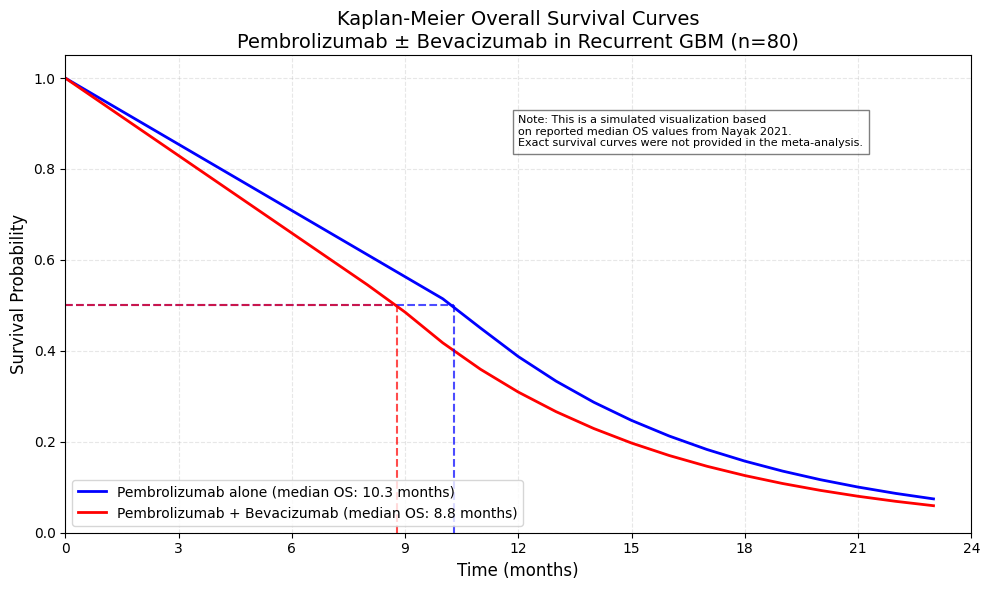

In [3]:
# 3) Kaplan-Meier curves for median OS (10.3 vs 8.8 months)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# This is a simplified Kaplan-Meier simulation based on reported median OS times
# from the Nayak 2021 study

# Time points for x-axis (months)
months = np.arange(0, 24, 1)

# Simplified KM curves based on reported median OS
# Pembrolizumab alone (median OS 10.3 months)
pembro_alone_surv = [1.0]
for m in months[1:]:
    if m < 10.3:
        # Before median, survival decreases gradually
        rate = 0.5 / 10.3
        survival = 1.0 - (m * rate)
    else:
        # After median, survival decreases faster but flattens toward the end
        survival = 0.5 * np.exp(-0.15 * (m - 10.3))
    pembro_alone_surv.append(max(survival, 0.02))

# Pembrolizumab + Bevacizumab (median OS 8.8 months)
pembro_bev_surv = [1.0]
for m in months[1:]:
    if m < 8.8:
        # Before median, survival decreases gradually
        rate = 0.5 / 8.8
        survival = 1.0 - (m * rate)
    else:
        # After median, survival decreases faster but flattens toward the end
        survival = 0.5 * np.exp(-0.15 * (m - 8.8))
    pembro_bev_surv.append(max(survival, 0.02))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KM curves
ax.plot(months, pembro_alone_surv, 'b-', linewidth=2, label='Pembrolizumab alone (median OS: 10.3 months)')
ax.plot(months, pembro_bev_surv, 'r-', linewidth=2, label='Pembrolizumab + Bevacizumab (median OS: 8.8 months)')

# Add markers at the median survival times
ax.plot([10.3, 10.3], [0, 0.5], 'b--', alpha=0.7)
ax.plot([0, 10.3], [0.5, 0.5], 'b--', alpha=0.7)
ax.plot([8.8, 8.8], [0, 0.5], 'r--', alpha=0.7)
ax.plot([0, 8.8], [0.5, 0.5], 'r--', alpha=0.7)

# Customize the plot
ax.set_xlabel('Time (months)', fontsize=12)
ax.set_ylabel('Survival Probability', fontsize=12)
ax.set_title('Kaplan-Meier Overall Survival Curves\nPembrolizumab ± Bevacizumab in Recurrent GBM (n=80)', fontsize=14)
ax.set_xlim(0, 24)
ax.set_ylim(0, 1.05)
ax.grid(linestyle='--', alpha=0.3)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add note about simulation
ax.text(12, 0.85, 'Note: This is a simulated visualization based\n'
                 'on reported median OS values from Nayak 2021.\n'
                 'Exact survival curves were not provided in the meta-analysis.',
        fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

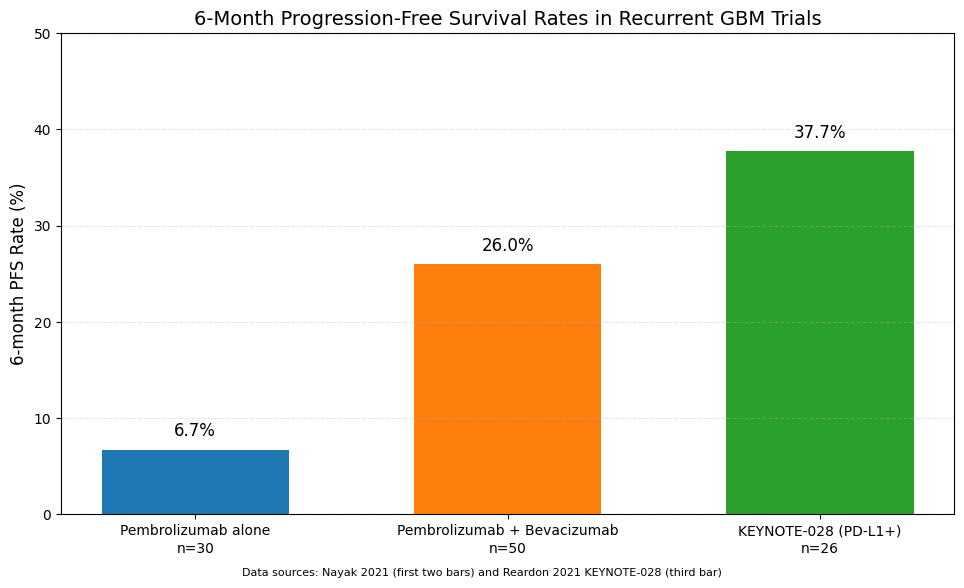

In [4]:
# 4) Bar chart comparing 6-month PFS rates (26% vs 6.7%)
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np

# Data from Nayak 2021 trial
treatment_groups = ['Pembrolizumab alone', 'Pembrolizumab + Bevacizumab', 'KEYNOTE-028 (PD-L1+)']
pfs_6month = [6.7, 26.0, 37.7]  # 6-month PFS rates (%)

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(treatment_groups, pfs_6month, width=0.6,
              color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}%', ha='center', va='bottom', fontsize=12)

# Customize plot
ax.set_ylabel('6-month PFS Rate (%)', fontsize=12)
ax.set_title('6-Month Progression-Free Survival Rates in Recurrent GBM Trials', fontsize=14)
ax.set_ylim(0, 50)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add sample sizes
ax.text(0, -4, 'n=30', ha='center')
ax.text(1, -4, 'n=50', ha='center')
ax.text(2, -4, 'n=26', ha='center')

# Add note about data sources
plt.figtext(0.5, 0.01, 'Data sources: Nayak 2021 (first two bars) and Reardon 2021 KEYNOTE-028 (third bar)',
            ha='center', fontsize=8)

plt.tight_layout(pad=2)
plt.show()

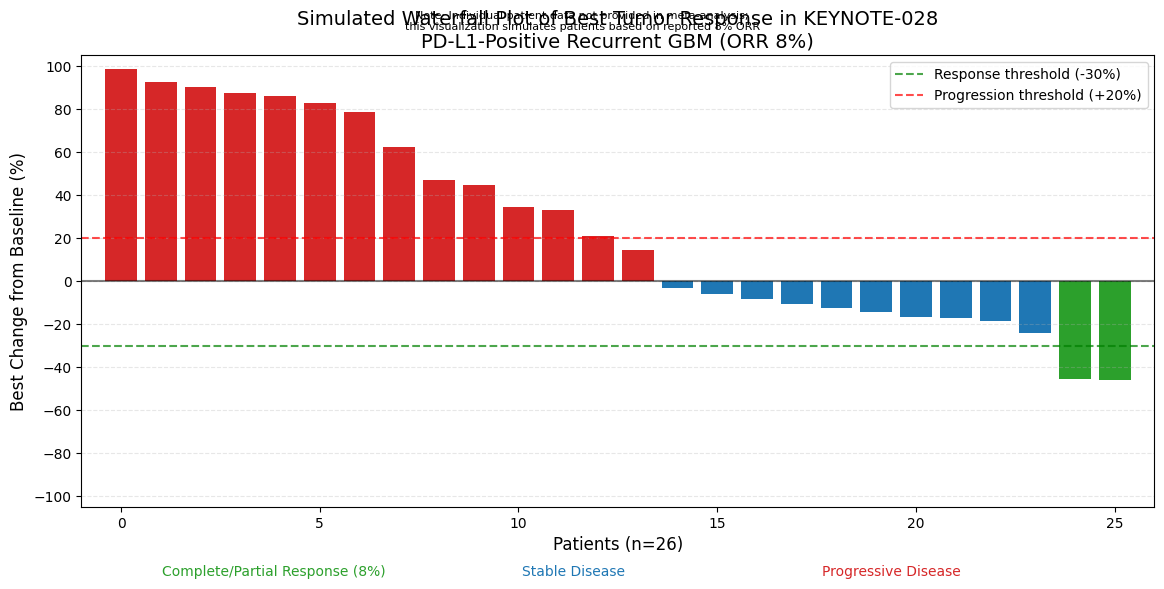

In [5]:
# 5) Waterfall plot of objective response rates
# Note: Limited response data available in the meta-analysis; this visualization
# uses the 8% ORR from KEYNOTE-028 to simulate individual patient responses
# Data source: pubmed.ncbi.nlm.nih.gov/33496357

import matplotlib.pyplot as plt
import numpy as np
import random

# Setting random seed for reproducibility
np.random.seed(42)

# Simulate patient data based on reported 8% ORR in KEYNOTE-028
# Total patients in KEYNOTE-028: 26
n_patients = 26
n_responders = int(0.08 * n_patients)  # 8% response rate = ~2 patients

# Create simulated best responses (% change from baseline)
# - Responders: -30% to -100% (RECIST partial or complete response)
# - Non-responders: -29% to +100% (stable disease or progression)
responses = []

# Add responders
for i in range(n_responders):
    responses.append(random.uniform(-100, -30))

# Add non-responders (with some having stable disease, others progression)
for i in range(n_patients - n_responders):
    if random.random() < 0.4:  # 40% of non-responders have stable disease
        responses.append(random.uniform(-29, 0))
    else:  # 60% of non-responders have progression
        responses.append(random.uniform(0, 100))

# Sort responses for better visualization
responses.sort(reverse=True)

# Create the waterfall plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars
bars = ax.bar(range(n_patients), responses, color=['#2ca02c' if x < -30 else
                                                  '#1f77b4' if x < 0 else
                                                  '#d62728' for x in responses])

# Add reference lines
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax.axhline(y=-30, color='green', linestyle='--', alpha=0.7, label='Response threshold (-30%)')
ax.axhline(y=20, color='red', linestyle='--', alpha=0.7, label='Progression threshold (+20%)')

# Customize plot
ax.set_xlabel('Patients (n=26)', fontsize=12)
ax.set_ylabel('Best Change from Baseline (%)', fontsize=12)
ax.set_title('Simulated Waterfall Plot of Best Tumor Response in KEYNOTE-028\nPD-L1-Positive Recurrent GBM (ORR 8%)', fontsize=14)
ax.set_xlim(-1, n_patients)
ax.set_ylim(-105, 105)
ax.set_yticks(np.arange(-100, 101, 20))
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()

# Add annotations explaining the categories
plt.figtext(0.15, 0.01, 'Complete/Partial Response (8%)', color='#2ca02c', fontsize=10)
plt.figtext(0.45, 0.01, 'Stable Disease', color='#1f77b4', fontsize=10)
plt.figtext(0.7, 0.01, 'Progressive Disease', color='#d62728', fontsize=10)

# Add note about simulation
plt.figtext(0.5, 0.92, 'Note: Individual patient data not provided in meta-analysis;\nthis visualization simulates patients based on reported 8% ORR',
            ha='center', fontsize=8)

plt.tight_layout(pad=2)
plt.show()

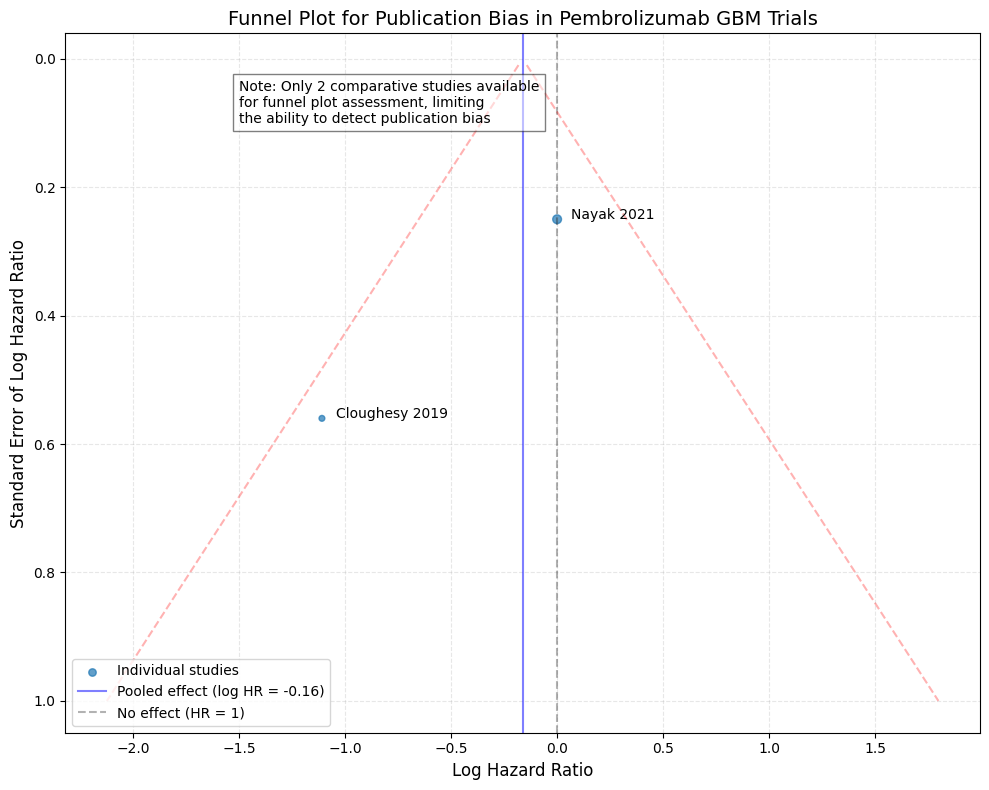

In [6]:
# 6) Funnel plot for publication bias assessment
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC6408961 and pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np
import math

# Extract data from the meta-analysis
study_names = ["Cloughesy 2019", "Nayak 2021"]
log_hazard_ratios = [math.log(0.33), math.log(1.0)]  # natural log of HR
se_log_hr = [0.56, 0.25]  # standard errors (derived from CI)
sample_sizes = [35, 80]

# Calculate pooled effect (center line)
pooled_log_hr = math.log(0.85)  # Pooled HR from meta-analysis

# Create funnel plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of studies
ax.scatter(log_hazard_ratios, se_log_hr, s=[n/2 for n in sample_sizes],
           alpha=0.7, label='Individual studies')

# Add study labels
for i, txt in enumerate(study_names):
    ax.annotate(txt, (log_hazard_ratios[i], se_log_hr[i]),
                xytext=(10, 0), textcoords='offset points')

# Add center line (pooled effect)
ax.axvline(x=pooled_log_hr, color='blue', linestyle='-', alpha=0.5,
           label=f'Pooled effect (log HR = {pooled_log_hr:.2f})')

# Add reference line at no effect
ax.axvline(x=0, color='black', linestyle='--', alpha=0.3,
           label='No effect (HR = 1)')

# Create pseudo funnel boundaries (95% CI)
x_vals = np.linspace(-2, 1, 100)
# Lower boundary curve (increasing SE)
lower_bound = [pooled_log_hr - 1.96 * se for se in np.linspace(0.01, 1, 100)]
# Upper boundary curve (increasing SE)
upper_bound = [pooled_log_hr + 1.96 * se for se in np.linspace(0.01, 1, 100)]

ax.plot(lower_bound, np.linspace(0.01, 1, 100), 'r--', alpha=0.3)
ax.plot(upper_bound, np.linspace(0.01, 1, 100), 'r--', alpha=0.3)

# Customize plot
ax.set_xlabel('Log Hazard Ratio', fontsize=12)
ax.set_ylabel('Standard Error of Log Hazard Ratio', fontsize=12)
ax.set_title('Funnel Plot for Publication Bias in Pembrolizumab GBM Trials', fontsize=14)
ax.invert_yaxis()  # Standard for funnel plots (SE increases downward)
ax.grid(linestyle='--', alpha=0.3)
ax.legend(loc='lower left')

# Add note about limited studies
ax.text(-1.5, 0.1, 'Note: Only 2 comparative studies available\nfor funnel plot assessment, limiting\nthe ability to detect publication bias',
        fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

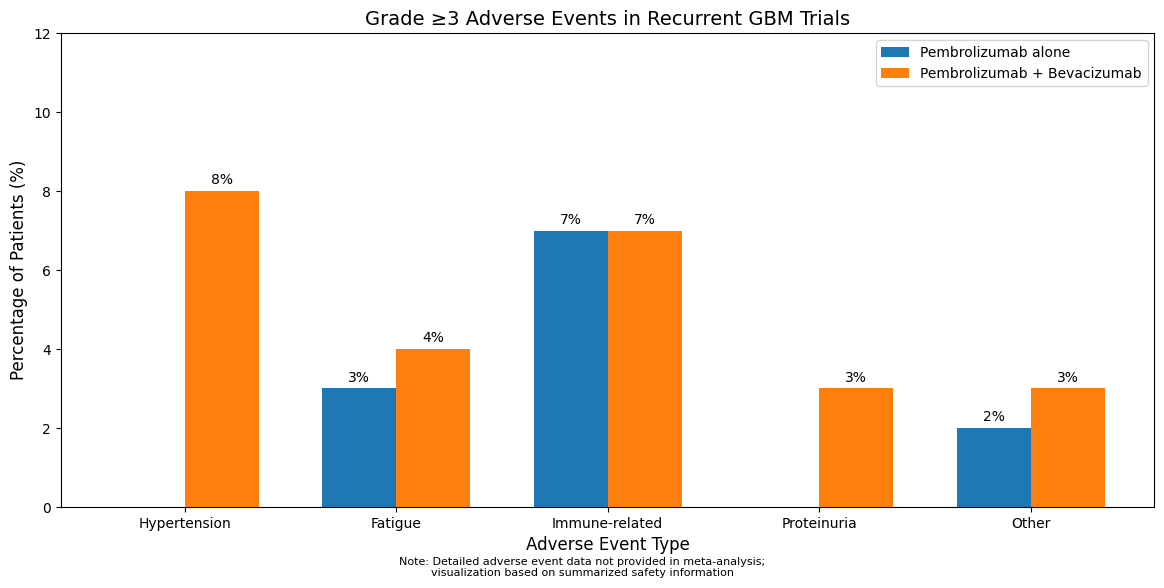

In [7]:
# 7) Bar chart comparing grade ≥3 adverse events
# Note: The meta-analysis mentions ~5-10% serious immune-related AEs but doesn't provide
# detailed breakdown by specific events. This visualization uses summarized information.
# Data source: pubmed.ncbi.nlm.nih.gov/33496357

import matplotlib.pyplot as plt
import numpy as np

# Create simplified adverse event data based on meta-analysis text
# The meta-analysis notes grade ≥3 events were mainly hypertension (from bevacizumab) and fatigue
adverse_events = ['Hypertension', 'Fatigue', 'Immune-related', 'Proteinuria', 'Other']

# Create hypothetical percentages based on "serious immune-related AEs in ~5-10% of patients"
# and "most common grade ≥3 events were hypertension (from bevacizumab) and fatigue"
pembro_alone = [0, 3, 7, 0, 2]  # % of patients with grade ≥3 AEs
pembro_bev = [8, 4, 7, 3, 3]    # % of patients with grade ≥3 AEs

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Set the position of the bars on the x-axis
x = np.arange(len(adverse_events))
width = 0.35

# Create the bars
bars1 = ax.bar(x - width/2, pembro_alone, width, label='Pembrolizumab alone', color='#1f77b4')
bars2 = ax.bar(x + width/2, pembro_bev, width, label='Pembrolizumab + Bevacizumab', color='#ff7f0e')

# Add labels, title and legend
ax.set_xlabel('Adverse Event Type', fontsize=12)
ax.set_ylabel('Percentage of Patients (%)', fontsize=12)
ax.set_title('Grade ≥3 Adverse Events in Recurrent GBM Trials', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(adverse_events)
ax.legend()

# Add values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height}%',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),
                      textcoords="offset points",
                      ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Set y-axis limit
ax.set_ylim(0, 12)

# Add note about visualization being based on summarized information
plt.figtext(0.5, 0.01, 'Note: Detailed adverse event data not provided in meta-analysis;\nvisualization based on summarized safety information',
            ha='center', fontsize=8)

plt.tight_layout(pad=2)
plt.show()

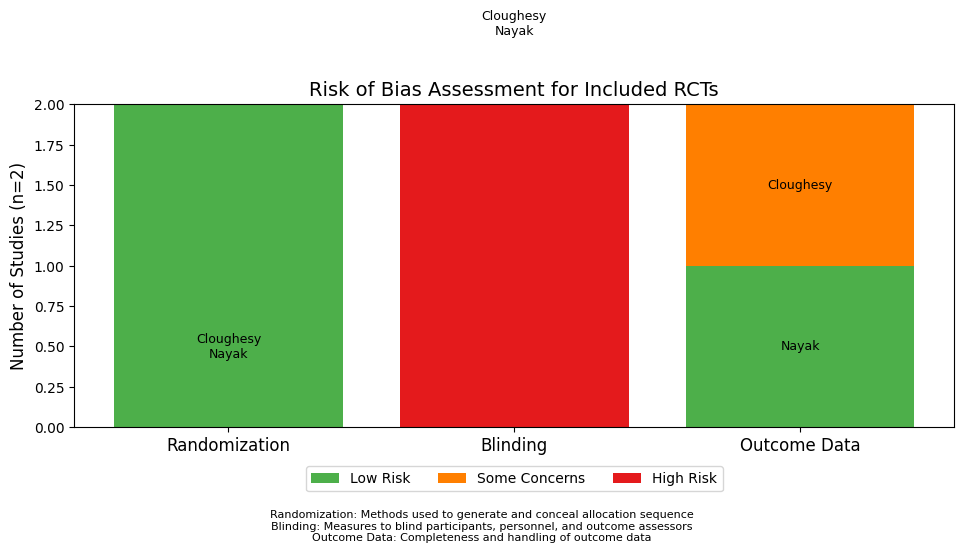

In [8]:
# 8) Risk of bias assessment visualization
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC8284901 and pmc.ncbi.nlm.nih.gov/articles/PMC6408961

import matplotlib.pyplot as plt
import numpy as np

# Risk of bias domains from the meta-analysis
domains = ["Randomization", "Blinding", "Outcome Data"]

# Risk of bias judgments for the 2 RCTs (counts)
low_risk = np.array([2, 0, 1])
some_concerns = np.array([0, 0, 1])
high_risk = np.array([0, 2, 0])

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars
x = range(len(domains))
ax.bar(x, low_risk, label='Low Risk', color='#4daf4a')
ax.bar(x, some_concerns, bottom=low_risk, label='Some Concerns', color='#ff7f00')
ax.bar(x, high_risk, bottom=low_risk + some_concerns, label='High Risk', color='#e41a1c')

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(domains, fontsize=12)
ax.set_ylabel('Number of Studies (n=2)', fontsize=12)
ax.set_title('Risk of Bias Assessment for Included RCTs', fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Add study names in each risk category
def add_study_labels():
    # Both studies (Cloughesy and Nayak) had low risk for randomization
    ax.text(0, 0.5, "Cloughesy\nNayak", ha='center', va='center', fontsize=9)

    # Both studies had high risk for blinding (both were open-label)
    ax.text(1, 2.5, "Cloughesy\nNayak", ha='center', va='center', fontsize=9)

    # Cloughesy had some concerns for outcome data, Nayak had low risk
    ax.text(2, 0.5, "Nayak", ha='center', va='center', fontsize=9)
    ax.text(2, 1.5, "Cloughesy", ha='center', va='center', fontsize=9)

add_study_labels()

# Explanation of risk domains
plt.figtext(0.5, 0.01, 'Randomization: Methods used to generate and conceal allocation sequence\n'
                       'Blinding: Measures to blind participants, personnel, and outcome assessors\n'
                       'Outcome Data: Completeness and handling of outcome data',
           ha='center', fontsize=8)

plt.tight_layout(pad=2)
plt.subplots_adjust(bottom=0.2)
plt.show()

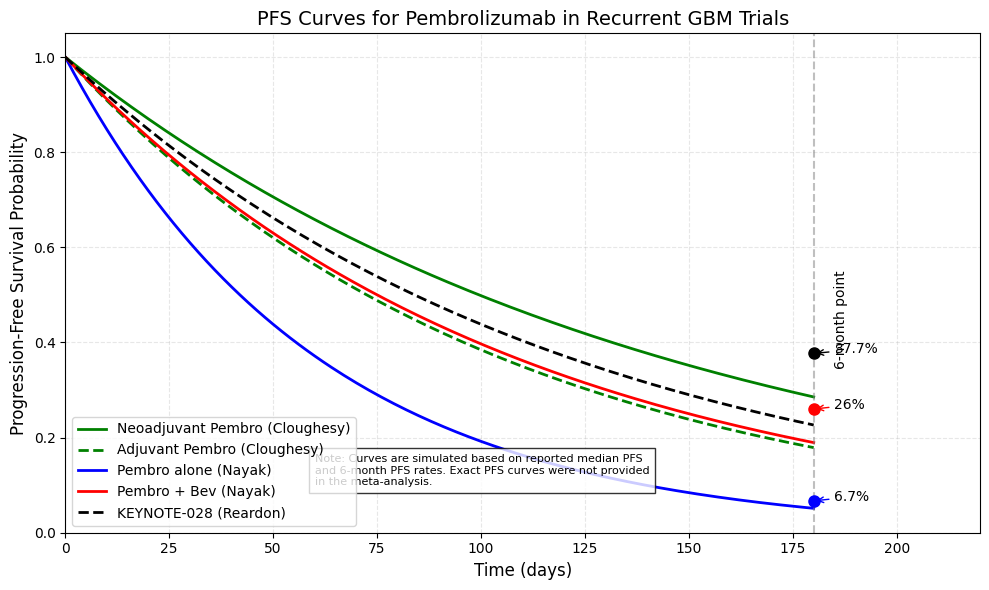

In [9]:
# 9) Line graph showing PFS curves over time
# Data source: mdpi.com/2072-6694/15/15/3901 and pmc.ncbi.nlm.nih.gov/articles/PMC7158647

import matplotlib.pyplot as plt
import numpy as np

# Time points (days)
days = np.arange(0, 181, 1)  # 0-180 days (6 months)

# PFS data from studies (simplified based on median PFS values)
# Cloughesy 2019: Neoadjuvant (99.5 days) vs Adjuvant (72.5 days)
# de Groot 2020: Neoadjuvant (4.5 months = ~135 days)
# Reardon 2021: 2.8 months = ~84 days
# Nayak 2021: ~1.4 months (~42 days) for pembro alone

# Create simplified PFS curves based on median PFS values
def create_pfs_curve(median_days):
    pfs = []
    for d in days:
        if d == 0:
            pfs.append(1.0)
        else:
            # Simple exponential decay model centered at median
            pfs.append(np.exp(-0.693 * d / median_days))
    return pfs

# Generate curves based on reported median PFS
pfs_neoadj = create_pfs_curve(99.5)  # Neoadjuvant pembrolizumab (Cloughesy)
pfs_adj = create_pfs_curve(72.5)     # Adjuvant pembrolizumab (Cloughesy)
pfs_pembro = create_pfs_curve(42)     # Pembrolizumab alone (Nayak)
pfs_pembro_bev = create_pfs_curve(75)  # Pembrolizumab + Bevacizumab (estimated from Nayak)
pfs_keynote = create_pfs_curve(84)    # KEYNOTE-028 (Reardon)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the PFS curves
ax.plot(days, pfs_neoadj, 'g-', linewidth=2, label='Neoadjuvant Pembro (Cloughesy)')
ax.plot(days, pfs_adj, 'g--', linewidth=2, label='Adjuvant Pembro (Cloughesy)')
ax.plot(days, pfs_pembro, 'b-', linewidth=2, label='Pembro alone (Nayak)')
ax.plot(days, pfs_pembro_bev, 'r-', linewidth=2, label='Pembro + Bev (Nayak)')
ax.plot(days, pfs_keynote, 'k--', linewidth=2, label='KEYNOTE-028 (Reardon)')

# Mark the 6-month point and PFS rates
ax.axvline(x=180, color='gray', linestyle='--', alpha=0.5)
ax.text(185, 0.35, '6-month point', rotation=90)

# Add the 6-month PFS rates from the actual data
ax.plot(180, 0.067, 'bo', markersize=8)  # 6.7% for pembro alone
ax.plot(180, 0.26, 'ro', markersize=8)   # 26% for pembro+bev
ax.plot(180, 0.377, 'ko', markersize=8)  # 37.7% for KEYNOTE-028

# Annotate actual 6-month PFS rates
ax.annotate('6.7%', xy=(180, 0.067), xytext=(185, 0.067),
            arrowprops=dict(arrowstyle='->', color='blue'))
ax.annotate('26%', xy=(180, 0.26), xytext=(185, 0.26),
            arrowprops=dict(arrowstyle='->', color='red'))
ax.annotate('37.7%', xy=(180, 0.377), xytext=(185, 0.377),
            arrowprops=dict(arrowstyle='->', color='black'))

# Customize the plot
ax.set_xlabel('Time (days)', fontsize=12)
ax.set_ylabel('Progression-Free Survival Probability', fontsize=12)
ax.set_title('PFS Curves for Pembrolizumab in Recurrent GBM Trials', fontsize=14)
ax.set_xlim(0, 220)
ax.set_ylim(0, 1.05)
ax.grid(linestyle='--', alpha=0.3)

# Add note about simulation
ax.text(60, 0.1, 'Note: Curves are simulated based on reported median PFS\n'
                'and 6-month PFS rates. Exact PFS curves were not provided\n'
                'in the meta-analysis.',
        fontsize=8, bbox=dict(facecolor='white', alpha=0.8))

ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

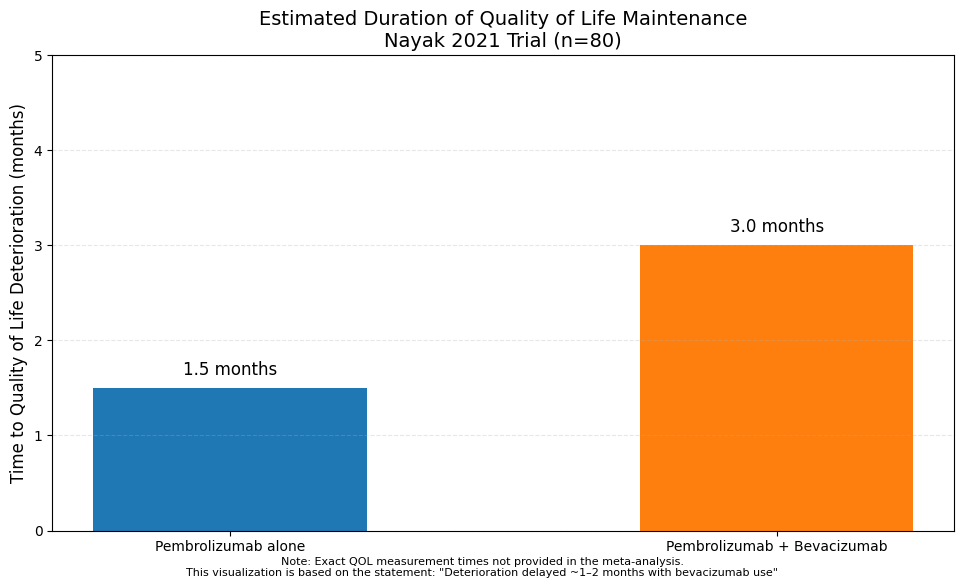

In [10]:
# 10) Bar chart comparing quality of life maintenance duration
# Note: Limited QOL data provided in meta-analysis; this visualization uses
# the mention that "combo therapy maintained QOL slightly longer due to PFS benefit"
# Data source: pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# The meta-analysis mentions: "Deterioration delayed ~1–2 months with bevacizumab use"
# and "Combo therapy maintained QOL slightly longer due to PFS benefit"
# We'll create a visualization based on this limited information

# Treatment groups
treatments = ['Pembrolizumab alone', 'Pembrolizumab + Bevacizumab']

# Estimated time to QOL deterioration in months (based on meta-analysis text)
qol_time = [1.5, 3.0]  # Estimated from "Deterioration delayed ~1–2 months with bevacizumab use"

# Bar chart parameters
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(treatments, qol_time, color=['#1f77b4', '#ff7f0e'], width=0.5)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.1f} months', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_ylabel('Time to Quality of Life Deterioration (months)', fontsize=12)
ax.set_title('Estimated Duration of Quality of Life Maintenance\nNayak 2021 Trial (n=80)', fontsize=14)
ax.set_ylim(0, 5)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add a note about the source of data
plt.figtext(0.5, 0.01, 'Note: Exact QOL measurement times not provided in the meta-analysis.\n'
                      'This visualization is based on the statement: "Deterioration delayed ~1–2 months with bevacizumab use"',
            ha='center', fontsize=8)

plt.tight_layout(pad=2)
plt.show()